In [3]:
from urllib import request

# d = request.urlopen('http://www.daum.net')
d = request.urlopen('http://developers.google.com')
d.read().decode('utf-8')

In [7]:
# !chcp 65001
# !dir
# !pip install requests

In [9]:
import requests
r = requests.get('http://www.naver.com')
r.status_code
r.text

200

In [10]:
# !pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [11]:
from selenium import webdriver

In [16]:
browser = \
    webdriver.Chrome(executable_path=r"D:\ssac-one2\dev-tools\chromedriver.exe") # r"" -> escape sequence 동장하지 않는 문자열

In [17]:
browser.get('http://python.org') # 브라우저의 주소입력창에 주로 입력하고 실행

In [19]:
menus = browser.find_elements_by_css_selector('#top ul.menu li')
pypi = None
for m in menus:
    if m.text == "PyPI":
        pypi = m
    print(m.text)

Python
PSF
Docs
PyPI
Jobs
Community


In [21]:
pypi.click()

In [22]:
import time

time.sleep(2) # 5초 대기

browser.quit() # 브라우저 종료

In [23]:
browser = webdriver.Chrome(executable_path=r"D:\ssac-one2\dev-tools\chromedriver.exe")

In [24]:
browser.get('http://www.daum.net')

time.sleep(3)

In [41]:
links = browser.find_elements_by_css_selector("div.slide_favorsch ul li a")

print(len(links))
keywords = []
for idx, link in enumerate(links): # enumerate(목록) -> 순서번호, 데이터
    # print("[{0}].{1}".format(idx, link.text))
    print("[{0}].{1}".format(idx, link.get_attribute('innerText')))
    keywords.append(link.get_attribute('innerText'))

print(keywords)

with open('keywords.csv', 'at', encoding='utf-8') as f:

    from datetime import datetime

    now = datetime.now()

    f.write("{0}-{1}-{2} {3}:{4}".format(now.year, now.month, now.day, now.hour, now.minute))
    for idx, keyword in enumerate(keywords):
        f.write(",{0}".format(keyword))
    f.write('\n')


15
[0].사회적 거리두기
[1].홍록기 공식입장
[2].누수탐지비용
[3].박신혜 기부
[4].크릴오일인지질
[5].코로나19 발생현황
[6].밤마실 종로
[7].비타민c
[8].진세연 MC확정
[9].식기건조대
[10].조정석 수상소감
[11].진 번아웃
[12].안전거울
[13].태일 미복귀전역
[14].밴딩기업체
['사회적 거리두기', '홍록기 공식입장', '누수탐지비용', '박신혜 기부', '크릴오일인지질', '코로나19 발생현황', '밤마실 종로', '비타민c', '진세연 MC확정', '식기건조대', '조정석 수상소감', '진 번아웃', '안전거울', '태일 미복귀전역', '밴딩기업체']


In [39]:
from datetime import datetime

now = datetime.now()

print(now)
print(now.year, now.month, now.day)

2020-12-04 18:02:23.820013
2020 12 4


In [42]:
browser.quit()

In [12]:
# !pip install numpy==1.19.3
# !pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [8]:
with open('data-files/constitution-en.txt', 'rt') as f:
    constition_en = f.read()

print( len(constition_en) )
constition_en[:30]

26798


'We the People of the United St'

In [16]:
wc = WordCloud()
wc = wc.generate(constition_en)
# wc.words_

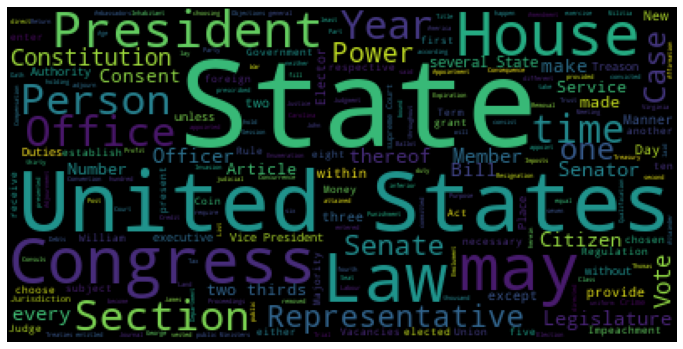

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [21]:
from wordcloud import STOPWORDS
# STOPWORDS
wc = WordCloud(stopwords=STOPWORDS).generate(constition_en)
# wc.words_

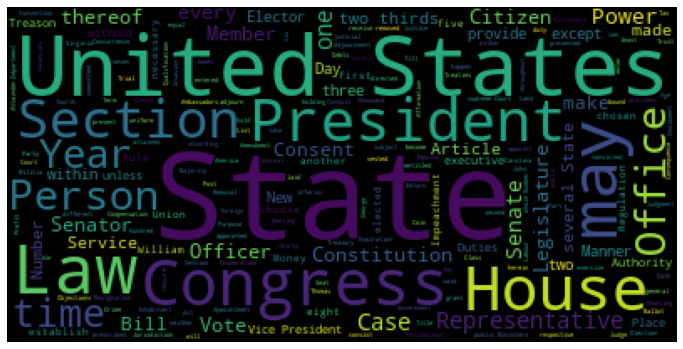

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [25]:
with open('data-files/constitution-ko.txt', 'rt', encoding="utf-8") as f:
    constition_ko = f.read()

print( len(constition_ko) )
constition_ko[:30]

18884


'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국'

In [27]:
!pip install nltk

Processing c:\users\oh.chi.hooooon\appdata\local\pip\cache\wheels\45\6c\46\a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266\nltk-3.5-py3-none-any.whl
  Using cached tqdm-4.54.1-py2.py3-none-any.whl (69 kB)
  Using cached joblib-0.17.0-py3-none-any.whl (301 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached regex-2020.11.13-cp37-cp37m-win_amd64.whl (269 kB)


In [29]:
from nltk.tokenize import WhitespaceTokenizer

In [30]:
tokens = WhitespaceTokenizer().tokenize(constition_ko)

In [31]:
tokens[:10]

['대한민국헌법',
 '유구한',
 '역사와',
 '전통에',
 '빛나는',
 '우리',
 '대한국민은',
 '3·1운동으로',
 '건립된',
 '대한민국임시정부의']

In [42]:
tokens = list( map(lambda x: x.replace('수', ''), tokens) )
tokens = list( map(lambda x: x.replace('또는', ''), tokens) )
tokens = list( map(lambda x: x.replace('①', ''), tokens) )
tokens = list( map(lambda x: x.replace('의하여', ''), tokens) )
tokens = list( map(lambda x: x.replace('있다', ''), tokens) )
tokens = list( map(lambda x: x.replace('한다', ''), tokens) )

tokens = list( filter(lambda x: len(x) > 0, tokens) )

In [43]:
from collections import Counter

In [44]:
counter = Counter(tokens)
#counter.most_common(100)

In [45]:
dict_data = dict(counter.most_common(100))
# dict_data

In [46]:
wc = WordCloud(font_path=r"C:\Windows\Fonts\NanumGothic.ttf").generate_from_frequencies(dict_data)

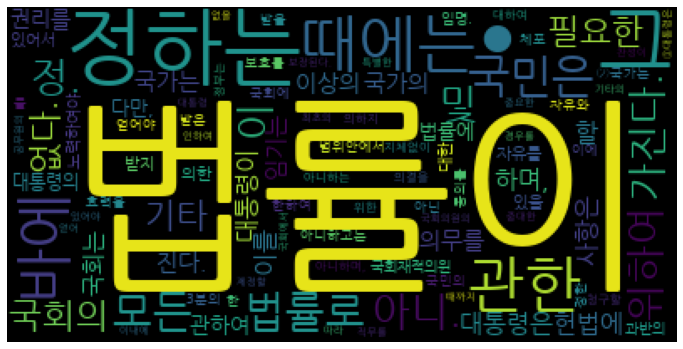

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis('off')
plt.show()